In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

In [75]:
df1 = pd.read_csv("C:/Users/Harshal Trivedi/Downloads/Fraud.csv")
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [76]:
df = df1

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [78]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [79]:
z_scores = np.abs(stats.zscore(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]))

# Filter out rows where Z-score > threshold (e.g., 3)
df= df[(z_scores < 3).all(axis=1)]

In [80]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [1 / (1 - LinearRegression().fit(X.drop(col, axis=1), X[col]).score(X.drop(col, axis=1), X[col])) for col in X.columns]
    return vif

X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
vif_data = calculate_vif(X)
print(vif_data)

          feature         VIF
0          amount    2.526416
1   oldbalanceOrg  328.376118
2  newbalanceOrig  337.889192
3  oldbalanceDest   99.159906
4  newbalanceDest  105.649335


In [81]:
def remove_multicollinearity(df, threshold=5.0):
    X = df.select_dtypes(include=[np.number])  # Select numeric columns
    vif_data = calculate_vif(X)
    
    while vif_data['VIF'].max() > threshold:
        max_vif_feature = vif_data.sort_values('VIF', ascending=False).iloc[0]
        
        # Drop the feature with the highest VIF
        X = X.drop(columns=[max_vif_feature['feature']])
        
        # Recalculate VIF
        vif_data = calculate_vif(X)
    
    return X

In [82]:
df2 = remove_multicollinearity(df)

In [83]:
df2

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,0.00,0,0
1,1,1864.28,21249.00,0.00,0,0
2,1,181.00,181.00,0.00,1,0
3,1,181.00,181.00,21182.00,1,0
4,1,11668.14,41554.00,0.00,0,0
...,...,...,...,...,...,...
6362613,743,1258818.82,1258818.82,503464.50,1,0
6362614,743,339682.13,339682.13,0.00,1,0
6362615,743,339682.13,339682.13,0.00,1,0
6362618,743,850002.52,850002.52,0.00,1,0


In [84]:
df.shape  # original value: 6362620 rows × 11 columns

(6090589, 11)

In [85]:
df = pd.merge(df, df2, on=['step','amount','oldbalanceOrg','oldbalanceDest','isFraud','isFlaggedFraud'], how='inner')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6093614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0
6093615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6093616,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6093617,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [86]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [87]:
df = df.drop_duplicates()

In [88]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6093612,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0
6093613,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0
6093615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6093617,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [89]:
df = df.drop(['step'], axis =1)

In [90]:
df.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
amount,1.000000,0.019546,0.024760,0.271825,0.372485,0.048890,0.001968
oldbalanceOrg,0.019546,1.000000,0.997774,0.124747,0.080769,0.000208,0.000143
newbalanceOrig,0.024760,0.997774,1.000000,0.128224,0.080255,-0.010534,0.000129
oldbalanceDest,0.271825,0.124747,0.128224,1.000000,0.986118,-0.008391,-0.000352
newbalanceDest,0.372485,0.080769,0.080255,0.986118,1.000000,-0.005258,-0.000376
isFraud,0.048890,0.000208,-0.010534,-0.008391,-0.005258,1.000000,0.021497
isFlaggedFraud,0.001968,0.000143,0.000129,-0.000352,-0.000376,0.021497,1.000000


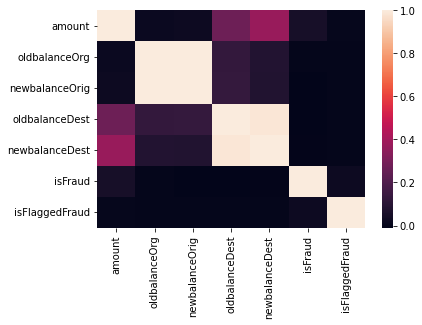

In [91]:
data = df.corr()
hm = sns.heatmap(data = data)
plt.show()

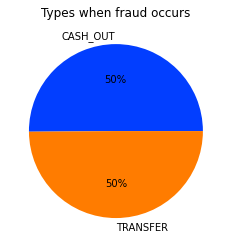

In [92]:
fraudulent_transactions = df1[df1['isFraud'] == 1]
type_counts = fraudulent_transactions['type'].value_counts()
plt.title('Types when fraud occurs')
palette_color = sns.color_palette('bright') 
plt.pie(type_counts, labels=type_counts.index, colors=palette_color, autopct='%.0f%%') 
plt.show() 

In [93]:
df = df[(df['type'] == 'CASH-OUT') | (df['type'] == 'TRANSFER')]
df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...
6093607,TRANSFER,258355.42,C1226129332,258355.42,0.0,C1744173808,0.00,0.00,1,0
6093609,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6093611,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6093613,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0


In [94]:
df = df.drop(['type','nameOrig','nameDest'], axis=1)

In [95]:
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [96]:
# Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9998739959048669
